# **Terza Esercitazione**
# Infiltrazione dell'acqua in una colonna di suolo

L'obiettivo della terza parte dell'esercitazione è quello di studiare l'infiltrazione dell'acqua all'interno di una colonna a più strati di suolo attraverso l'equazione di Richards (1D).  Quest'ultima rappresenta l'equazione di conservazione della massa all'interno del suolo e tiene conto di un termine gravitativo, uno avvettivo ed uno diffusivo:

\begin{equation}
\frac{\delta\theta}{\delta t} + \frac{\delta}{\delta z}(K(\theta_{w}\cdot\frac{\delta(\phi + z)}{\delta z})
\end{equation}

In caso, infatti, di disequilibrio nel carico idraulico, si deve venire a formare un movimento dell'acqua perchè venga compensato. Inoltre, tale equazione è in generale valida per i suoli insaturi, può però essere anche estesa a quelli saturi.


La trattazione in questo caso sarà discreta per semplificare il problema: vengono quindi considerati i valori in alcuni punti nel dominio e dev'essere a questo fine introdotta una griglia. Per avere risultati più precisi sarà poi necessario infittire i punti che formano la griglia: per avere maggiorni informazioni nei punti che più ci interessano senza appesantire troppo il programma, è stata costruita più fitta in vicinanza della superficie rispetto ai punti più in profondità.

Per eseguire il programma, è quindi neceessario: assegnare un dominio di calcolo, la griglia di calcolo e un dominio iniziale.

Vengono importati i file .csv relativi alla griglia, alle condizioni iniziali e al modello utilizzato per la risoluzione (che in questo caso consiste nella parametrizzazione di Van Genuchten).

## Prima simulazione: 
Nella prima parte dell'esercitazione è stato preso in considerazione un suolo formato da due strati:
- Sabbia fino ad una profondità di $0.3$ [$m$]
- Argilla Limosa fino ad una profondità di $2$ [$m$]

Questa stratigrafia ricorda quella che si trova nelle vicinanze della stazione scelta per il calcolo delle curve di possibilità pluviometrica, situata a Venezia. Non essendo possibile studiare la stratigrafia del suolo della città in sè, dato che è stata costruita su delle palafitte, si è scelto di prendere infatti in considerazione il terreno che si trova nei dintorni: per l'infiltrazione dell'acqua nella colonna di suolo che si vedrà in questo Notebook è stato preso come riferimento il Lido di Venezia mentre per la generazione di Runoff riportata di seguito Mestre.

Per quello che riguarda invece la condizione iniziale si parte assegnando una condizione idrostatica (di equlibrio), in modo che l'evoluzione nel tempo dipenda solo dalle condizioni al contorno. Poniamo quindi alla profondità $-2$ [$m$] la suzione pari a $0$ [$m$] (quindi la transizione tra suolo saturo e insaturo) mentre in superficie ci sarà una suzione di $-2$ [$m$].

Si procede, quindi, andando a creare la griglia a partive dai file .csv descritti.

In [1]:
import os
import pandas as pd 

from geoframepy.whetgeo1d import grid_creator 
from geoframepy.whetgeo1d import grid_to_netcdf
import matplotlib.colors as cl
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
project_path = os.path.dirname(os.getcwd())



In [2]:
grid_input_file_name = project_path + "/data/Grid_input/ex02_grid.csv"
ic_input_file_name = project_path + "/data/Grid_input/ex02_ic.csv" 
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv" 
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'
dz_min = 0.005
dz_max = 0.1
b = 0.1
psi_interp_model = "linear"
T_interp_model = "linear"

In [3]:
output_file_name =  project_path + "/data/Grid_NetCDF/Ric2.nc"
output_title = '''Griglia per la risoluzione dell'equazione di Richards.
                  '''
output_date = ''

output_summary = ''' 

Type,eta,K,equationStateID,parameterID
L,0,50,0,1
L,-1.5,30,0,10
L,-2,0,nan,nan


eta,Psi0,T0
-0.0,-2.0,273.15
-2.0,0.0,273.15

'''


output_institution = 'GEOframe'

In [4]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                   theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                   output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type  eta   K  equationStateID  parameterID
0    L  0.0  50              0.0          1.0
1    L -0.3  50              0.0         10.0
2    L -2.0   0              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0  -2.0  273.15
1 -2.0   0.0  273.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5          1.000000e-08         4.400000e-10   
1     0.41   0.057  2.28   12.4          1.000000e-08         4.400000e-10   
2     0.41   0.065  1.89    7.5          1.000000e-08         4.400000e-10   
3     0.45   0.067  1.41    2.0          1.000000e-08         4.400000e-10   
4     0.43   0.078  1.56    3.6          1.000000e-08         4.400000e-10   
5     0.39   0.100  1.48    5.9          1.000000e-08         4.400000e-10   
6     0.43   0.089  1.23    1.4          1.000000e-08         4.400000e-10   
7     0.41   0.095  1.31    1.9          1.000000e-08         4.400000e-10   
8     0.38   0.100  1.23    2.7

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
%matplotlib inline

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True, 
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

plt.rcParams.update(nice_fonts)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#d53e4f','#fc8d59','#e9a3c9','#99d594','#3288bd','#313695']
project_path = os.path.dirname(os.getcwd())

Vengono quindi definite altre funzioni, specificando le condizioni al contorno, che in questo caso, sono quella di Dirichlet per la superficie superiore mentre, per quella inferiore, si assume suzione nulla.

In [6]:
os.chdir(project_path+'/output')
#os.listdir()

In [7]:
ds = xr.open_dataset("Ric2_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.983 -1.949 -1.915 ... -0.009 -0.003
  * dualDepth         (dualDepth) float64 -2.0 -1.966 -1.932 ... -0.012 -0.006
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:             Top Dirichlet
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

### Grafico 2D

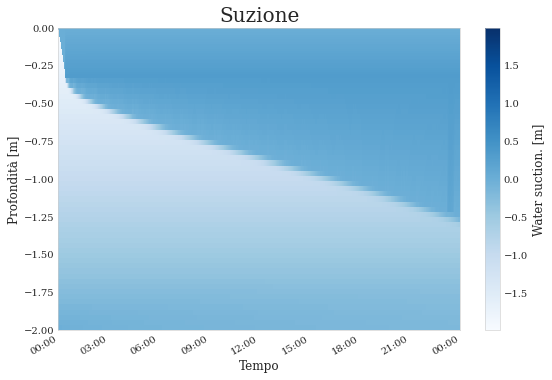

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.plot(ax=ax, y='depth', cmap='Blues') 

ax.set_title('Suzione', fontsize=20)
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)

plt.show()

L'andamento del grafico rappresenta l'andamento nel tempo della suzione che ci si aspetterebbe in presenza di una lama d'acqua al di sopra del suolo: il comportamento è decisamente più drenante nella sabbia, ma in generale anche nell'argilla si nota come la lama d'acqua si muova poi verso il basso.

Viene riportata poi l'immagine estratta da una simulazione svolta con una griglia con un numero minore di punti nello strato di argilla limosa: è evidente come in quel caso la qualità del grafico fosse molto più bassa e per questo si è deciso di aumentare il numero di punti che discretizzavano lo strato, impostando $K = 50$
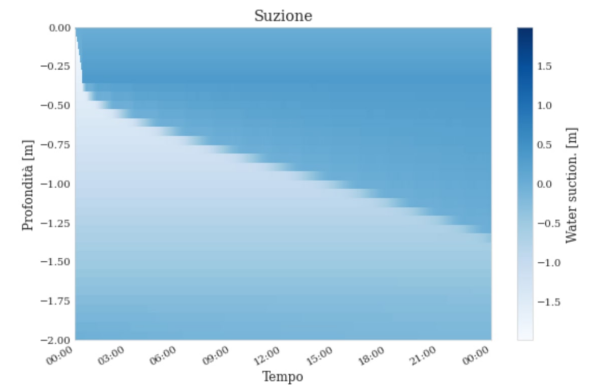

In [9]:
ds.time.values

array(['2020-01-01T00:00:00.000000000', '2020-01-01T00:01:00.000000000',
       '2020-01-01T00:02:00.000000000', ...,
       '2020-01-01T23:58:00.000000000', '2020-01-01T23:59:00.000000000',
       '2020-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

### Suzione in funzione della profondità del suolo
Questo grafico mostra il valore della suzione in funzione della profondità del suolo in tre momenti diversi: sono stati scelti come valori uno a inizio della simulazione, uno poco successivo e infine a distanza di 21h.

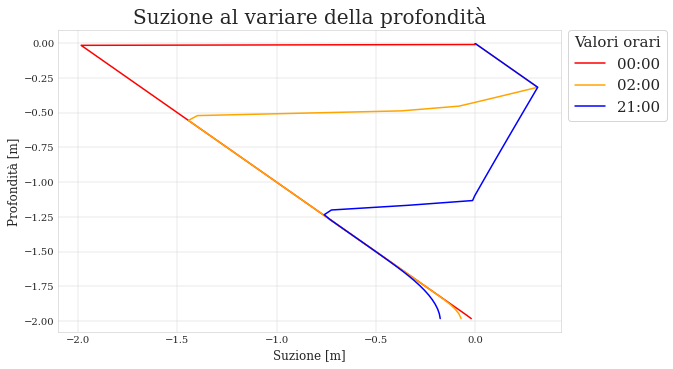

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(time= '2020.01.01 00:00').plot(ax=ax, y='depth', color='red') 
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax, y='depth', color='orange')

ds.psi.sel(time='2020-01-01 21:00').plot(ax=ax, y='depth', color='blue')
ax.set_title('Suzione al variare della profondità', fontsize=20)
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Suzione [m]')
plt.legend(['00:00', '02:00', '21:00'], loc='center left',  title = "Valori orari", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1, 0.85))

plt.show()

 E' evidente come lentamente l'andamento della suzione si distanzi dalla condizione iniziale idrostatica, in quanto l'evoluzione nel tempo dipende solo dalle condizioni al contorno.

 Col passare del tempo si ha inoltre un abbassamento della falda dipendente dalle condizioni al contorno (era infatti stato impostato $free drainage$)

### Suzione in funzione del tempo
Il seguente grafico consiste invece nella valutazione dell'andamento della suzione nel tempo, considerando valori di profondità costanti:

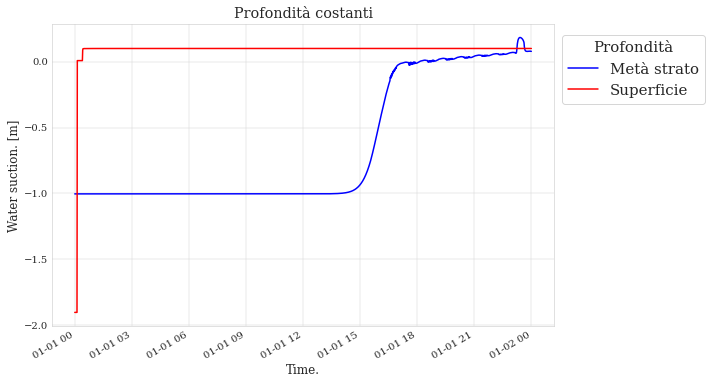

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(depth=-1, method='nearest').plot(ax=ax, color='blue', label = 'Metà strato')
ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax, color='red', label = 'Superficie')
# ax.set_title('text')
# ax.set_ylabel('text')
# ax.set_xlabel('text')
plt.legend(['Metà strato', 'Superficie'], loc='center left',  title = "Profondità", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1, 0.85))

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)
ax.set_title("Profondità costanti")
plt.show()

#funzione inizia ad aumentare solo verso la fine

### Flusso di acqua in funzione del tempo

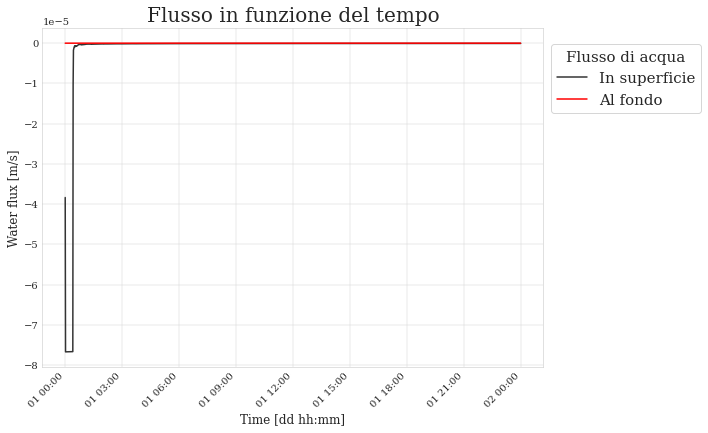

In [12]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.legend(['In superficie', 'Al fondo'], loc='center left',  title = "Flusso di acqua", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1, 0.85))
ax.set_title("Flusso in funzione del tempo", fontsize=20)


plt.tight_layout()
plt.show()

In questo caso c'è una lama d'acqua sopra il suolo: il flusso d'acqua sulla superficie è concentrato all'inizio della simulazione

# Precipitazione su suolo Multi-Strato

Si ripete poi la trattazione cambiando la condizione al contorno. Invece di una lama d'acqua in superficie si prende in considerazione una precipitazione impattante suol suolo: in questo caso le condizioni sulla superficie sono di Neumann e non di Dirichlet.

Quello che andiamo a specificare è l'intensità della pioggia.

La griglia che viene utilizzata è la stessa. 

In [13]:
from geoframepy.timeseries import io_csv

ds = xr.open_dataset("Ric2_Pioggia_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 577)
Coordinates:
  * depth             (depth) float64 -1.983 -1.949 -1.915 ... -0.009 -0.003
  * dualDepth         (dualDepth) float64 -2.0 -1.966 -1.932 ... -0.012 -0.006
  * time              (time) datetime64[ns] 2020-02-29T10:00:00 ... 2020-03-0...
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex02 time step 5 minutes.
    Top_boundary_condition:             Top Neumann
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

In [14]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/pioggia_ve3.csv',datetime_index=False)
rain

,Datetime,0
0,2020-02-29 10:00:00,0.0
1,2020-02-29 10:05:00,0.0
2,2020-02-29 10:10:00,0.0
3,2020-02-29 10:15:00,0.0
4,2020-02-29 10:20:00,0.0
...,...,...
572,2020-03-02 09:40:00,0.0
573,2020-03-02 09:45:00,0.0
574,2020-03-02 09:50:00,0.0
575,2020-03-02 09:55:00,0.0


In [15]:
rain['0']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
572    0.0
573    0.0
574    0.0
575    0.0
576    0.0
Name: 0, Length: 577, dtype: float64

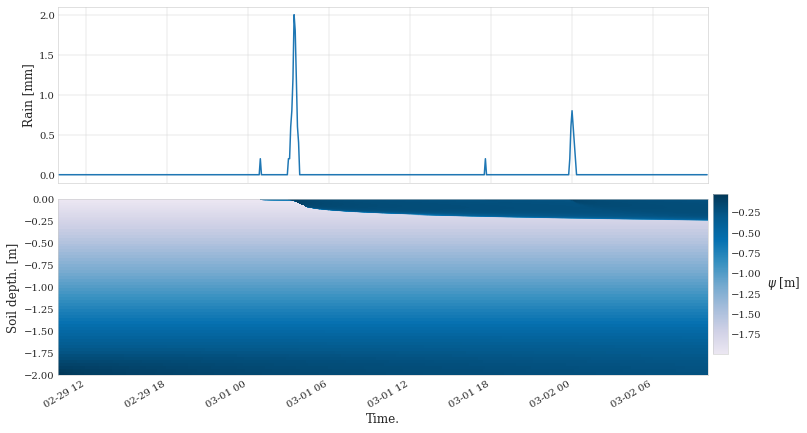

In [16]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]')


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

#ax[1].set_ylabel('Depth [m]')
#ax[1].set_xlabel('Time [dd hh:mm]')


#ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
a#x[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.99, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

#mentre prima avevamo un valore di suzione costante nel tempo, in questo caso abbiamo un primo impulso e poi un altro più breve
#vediamo che nella parte della sezione non cambia niente, poi inizia a piovere = suolo inizia a saturare. blu più intenso = picco della saturazione
#blu diventa molto più chiaro ma poi col secondo picco vediamo che c'è un nuovo aumento della suzione

La suzione dipende dalla presenza dei due impulsi di precipitazione: il blu più intenso contraddistingue il picco di precipitazione, quando diventa più chiaro c'è un secondo picco, che tende poi a infiltrare verso il basso

La suzione nella prima parte dell'esercitazione cambia solamente leggermente verso il basso, per la condizione di free drenage.

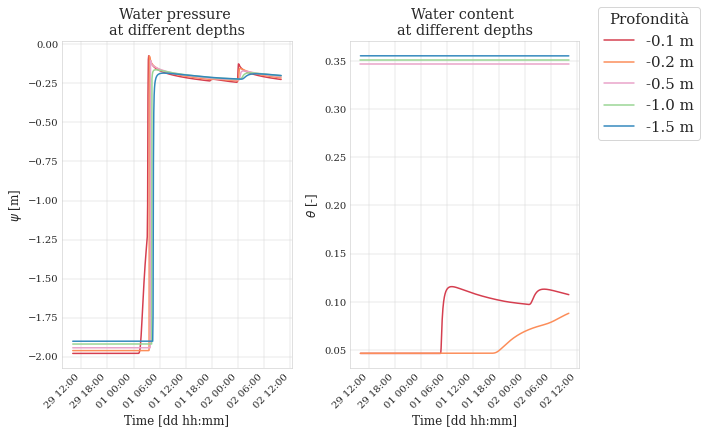

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.02,  method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.04,  method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.06,  method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-0.08,  method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-0.1,   method='nearest').plot(ax=ax1, color=colors[4])


ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
#ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
#ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[3])
ds.theta.sel(depth=-1.5, method='nearest').plot(ax=ax2, label = '-1.5 m', color=colors[4])
#plt.legend(['-0.1 m', '-0.2 m', '-0.5 m','-1.0 m', '-1.5 m'], loc='center left',  title = "Prof", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1, 0.85))

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(loc='center left', bbox_to_anchor=(1.05,0.9), ncol=1, title = "Profondità", title_fontsize = 15, fontsize=15)

plt.tight_layout()
plt.show()


Per quello che riguarda l'andamento della suzione e del contenuto d'acqua in funzione della profondità si può notare che per profondità piccole la risposta è istantanea; andando più in profondità, invece, la curva inizia a salire più tardi e il picco è meno pronunciato. Sotto i 50cm gli andamenti del secondo grafico sono tutti costanti.

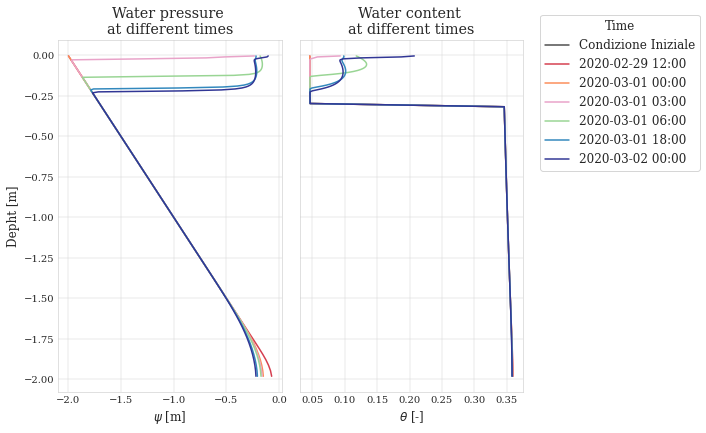

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

# ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2020-02-29 12:00').plot(ax=ax1, y='depth', label='2020-02-29 12:00', color=colors[0])
ds.psi.sel(time='2020-03-01 00:00').plot(ax=ax1, y='depth', label='2020-03-01 00:00', color=colors[1])
ds.psi.sel(time='2020-03-01 03:00').plot(ax=ax1, y='depth', label='2020-03-01 03:00', color=colors[2])
ds.psi.sel(time='2020-03-01 06:00').plot(ax=ax1, y='depth', label='2020-03-01 06:00', color=colors[3])
ds.psi.sel(time='2020-03-01 18:00').plot(ax=ax1, y='depth', label='2020-03-01 18:00', color=colors[4])
ds.psi.sel(time='2020-03-02 00:00').plot(ax=ax1, y='depth', label='2020-03-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Condizione Iniziale', color='0.3')
ds.theta.sel(time='2020-02-29 12:00').plot(ax=ax2, y='depth', label='2020-02-29 12:00', color=colors[0])
ds.theta.sel(time='2020-03-01 00:00').plot(ax=ax2, y='depth', label='2020-03-01 00:00', color=colors[1])
ds.theta.sel(time='2020-03-01 03:00').plot(ax=ax2, y='depth', label='2020-03-01 03:00', color=colors[2])
ds.theta.sel(time='2020-03-01 06:00').plot(ax=ax2, y='depth', label='2020-03-01 06:00', color=colors[3])
ds.theta.sel(time='2020-03-01 18:00').plot(ax=ax2, y='depth', label='2020-03-01 18:00', color=colors[4])
ds.theta.sel(time='2020-03-02 00:00').plot(ax=ax2, y='depth', label='2020-03-02 00:00', color=colors[5])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(loc='center left', bbox_to_anchor=(1.05,0.85), ncol=1, title_fontsize = 12, fontsize=12, title = "Time")

plt.tight_layout()
plt.show()

#profili=
#contenuto d'acqua, c'è una certa discontinuità

Alla profondità di -0.30, dove cambia la conducibilità idraulica dato che si passa dallo strato di sabbia a quello di argilla limosa, la suzione varia sull'idrostatica.

Dal grafico rappresentante il contenuto d’acqua si nota un salto: è infatti il carico idraulico a garantire la continuità e, a parità di suzione, per le curve di ritenzione idrica, il contenuto d’acqua dev’essere per forza diverso. Quindi, essendo i materiali che compongono gli strati diversi, il contenuto d’acqua dev’essere discontinuo.

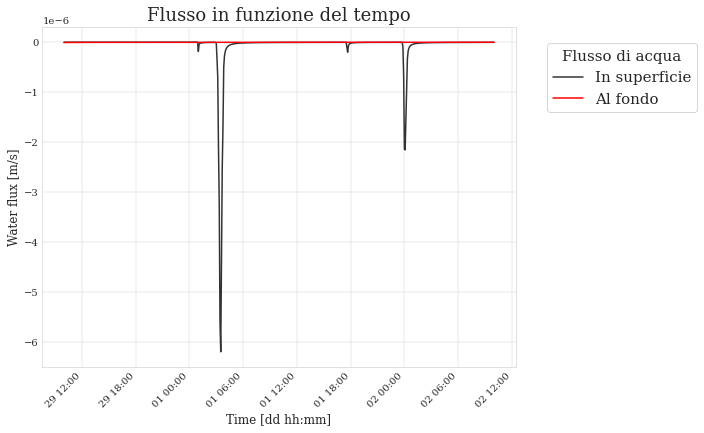

In [19]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.legend(['In superficie', 'Al fondo'], loc='center left',  title = "Flusso di acqua", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1.05,0.85))
ax.set_title("Flusso in funzione del tempo", fontsize=18)

plt.tight_layout()
plt.show()

in superficie inizialmente non c'è precipitazione quindi il flusso di acqua sulla superficie è inizialmente nullo. Il flusso di acqua aumenta poi in modo importante in corrispondenza dei due picchi di superfici: questo lo differenzia dalla simulazione di prima, dove c'era fin da subito un flusso verso il basso

Per quanto non sia evidente in assenza di zoom a causa della scala utilizzata, il flusso di acqua al fondo aumenta inizialmente per la condizione al contorno al fondo di $free drenage$.

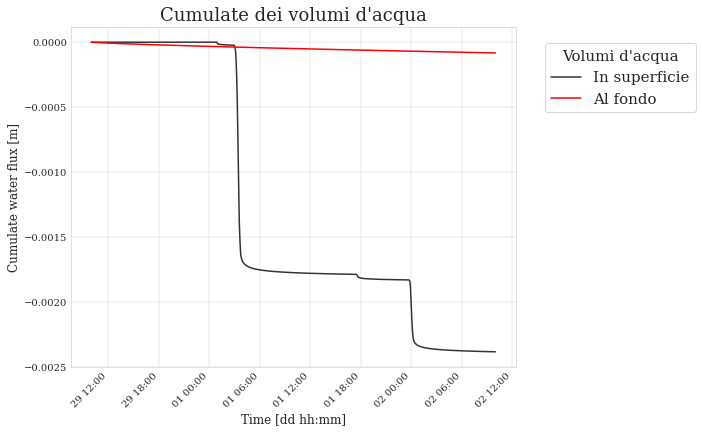

In [20]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.set_title("Cumulate dei volumi d'acqua", fontsize=18)

plt.legend(['In superficie', 'Al fondo'], loc='center left',  title = "Volumi d'acqua", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1.05,0.85))


plt.tight_layout()
plt.show()

L'ultimo grafico esponde i risultati cumulate dei volumi d'acqua. Il volume d'acqua che esce dal fondo per effetto del Free Drenage è rappresentato dalla linea rossa, mentre quello della superficie è la linea nera.

Si può osservare come il flusso d'acqua cumulato sia concentrato in presenza dei due picchi di precipitazione.

# Inversione degli orizzonti di suolo

Col fine di confrontare quanto anche l'ordine con cui si presentano i suoli che compongono una data stratigrafia possa incidere, è stata realizzata una griglia dove lo strato di sabbia e quello di argilla risultano invertiti. In questo caso lo strato con maggiore conducibilità idraulica (la sabbia) si troverà quindi verso il basso

In [21]:
grid_input_file_name = project_path + "/data/Grid_input/griglia_inv.csv"
ic_input_file_name = project_path + "/data/Grid_input/ex02_ic.csv" 
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv" #parametri per alcuni set di suolo
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'
dz_min = 0.005
dz_max = 0.1
b = 0.1
psi_interp_model = "linear"
T_interp_model = "linear"

In [22]:
output_file_name =  project_path + "/data/Grid_NetCDF/Inv.nc"
output_title = '''Griglia per la risoluzione dell'equazione di Richards.
                  '''
output_date = ''

output_summary = ''' 

Type,eta,K,equationStateID,parameterID
L,0,50,0,10
L,-1.5,30,0,1
L,-2,0,nan,nan


eta,Psi0,T0
-0.0,-2.0,273.15
-2.0,0.0,273.15

'''


output_institution = 'GEOframe'

In [23]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                   theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                   output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type  eta   K  equationStateID  parameterID
0    L  0.0  50              0.0         10.0
1    L -0.3  50              0.0          1.0
2    L -2.0   0              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0  -2.0  273.15
1 -2.0   0.0  273.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5          1.000000e-08         4.400000e-10   
1     0.41   0.057  2.28   12.4          1.000000e-08         4.400000e-10   
2     0.41   0.065  1.89    7.5          1.000000e-08         4.400000e-10   
3     0.45   0.067  1.41    2.0          1.000000e-08         4.400000e-10   
4     0.43   0.078  1.56    3.6          1.000000e-08         4.400000e-10   
5     0.39   0.100  1.48    5.9          1.000000e-08         4.400000e-10   
6     0.43   0.089  1.23    1.4          1.000000e-08         4.400000e-10   
7     0.41   0.095  1.31    1.9          1.000000e-08         4.400000e-10   
8     0.38   0.100  1.23    2.7

In [24]:
os.chdir(project_path+'/output')
ds = xr.open_dataset("Inv_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.983 -1.949 -1.915 ... -0.009 -0.003
  * dualDepth         (dualDepth) float64 -2.0 -1.966 -1.932 ... -0.012 -0.006
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:             Top Neumann
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

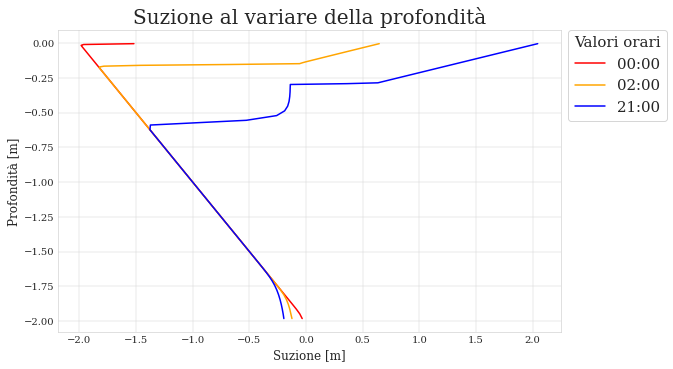

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(time= '2020.01.01 00:00').plot(ax=ax, y='depth', color='red') 
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax, y='depth', color='orange') 

ds.psi.sel(time='2020-01-01 21:00').plot(ax=ax, y='depth', color='blue')
ax.set_title('Suzione al variare della profondità', fontsize=20)
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Suzione [m]')
plt.legend(['00:00', '02:00', '21:00'], loc='center left',  title = "Valori orari", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1, 0.85))

plt.show()

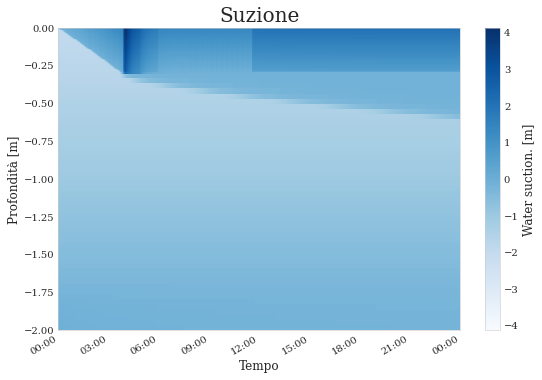

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.plot(ax=ax, y='depth', cmap='Blues') 

ax.set_title('Suzione', fontsize=20)
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)

plt.show()

Avendo l'argilla come strato più superficiale, il drenaggio risulta essere decisamente più lento rispetto a prima per i primi 30 cm. Viceversa, nella zona occupata dalla sabbia questo procede molto più velcoemente.